# Regularization Implementation

There are 4 techniques :

1.) Lasso (L1)

2.) Ridge(L2)

3.) ElasticNet(L1 & L2)

4.) Dropout

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Creating a simple classifier using MNIST data

In [2]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# Creating validataion from train_full data
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scaling the dataset for Normalization
x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0

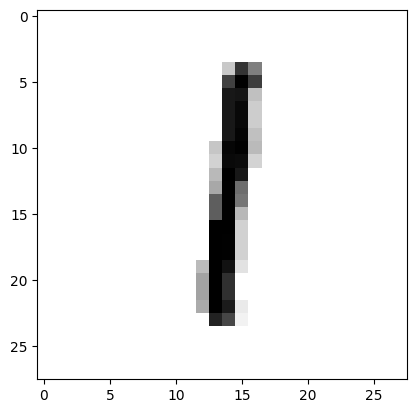

In [9]:
# Let's visualize some data

plt.imshow(x_train[500], cmap= "binary")
plt.show()

<Axes: >

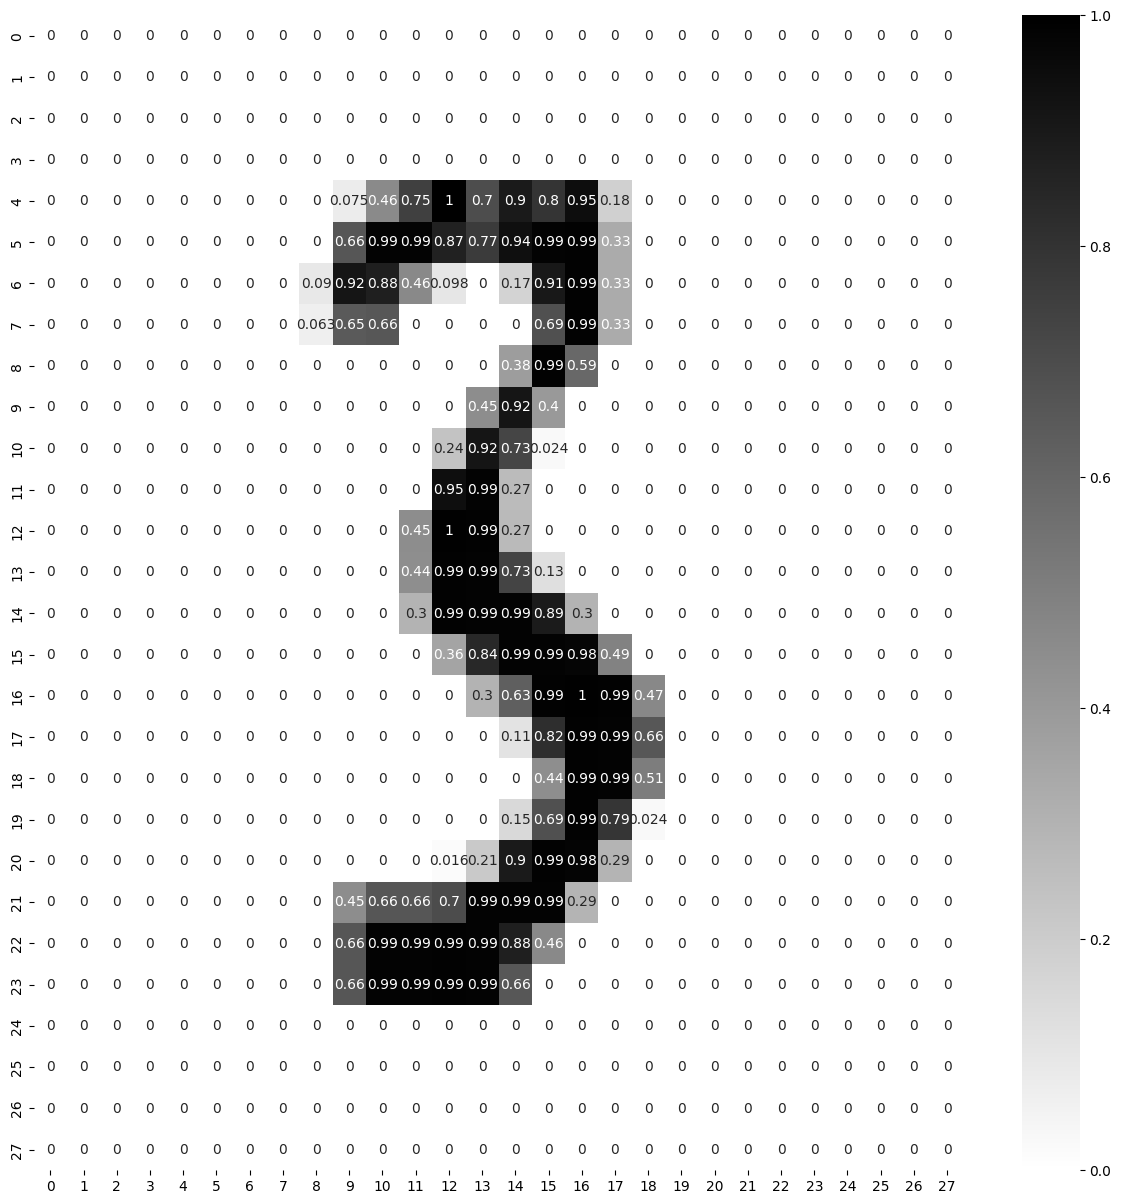

In [11]:
plt.figure(figsize = (15, 15))
sns.heatmap(x_train[1500], annot = True, cmap = "binary")

# Implementing Regularization

In [12]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

## Method1 to define an ANN

In [27]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape = [28,28], name = "InputLayer"),
    tf.keras.layers.Dense(300, activation= "relu", name = "HiddenLayer1", kernel_regularizer= regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation= "relu", name = "HiddenLayer2"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation= "softmax", name = "OutputLayer")
]

model1 = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,810 (1.02 MB)

 Trainable params: 267,210 (1.02 MB)

 Non-trainable params: 600 (2.34 KB)

In [30]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model1.compile(loss=LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = METRICS)

EPOCHS = 5
VALIDATON_SET = (x_valid, y_valid)

history1 = model1.fit(x_train, y_train, epochs = EPOCHS, validation_data = VALIDATON_SET, batch_size= 32)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8047 - loss: 0.7014 - val_accuracy: 0.9486 - val_loss: 0.2173
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9365 - loss: 0.2595 - val_accuracy: 0.9648 - val_loss: 0.1681
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9517 - loss: 0.2014 - val_accuracy: 0.9688 - val_loss: 0.1509
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9610 - loss: 0.1728 - val_accuracy: 0.9718 - val_loss: 0.1361
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9674 - loss: 0.1492 - val_accuracy: 0.9744 - val_loss: 0.1287


In [33]:
pd.DataFrame(history1.history)

,accuracy,loss,val_accuracy,val_loss
0,0.880545,0.449035,0.9486,0.217297
1,0.939764,0.246953,0.9648,0.168117
2,0.953036,0.198255,0.9688,0.150920
3,0.961691,0.170187,0.9718,0.136073
4,0.967236,0.150689,0.9744,0.128695


<Axes: >

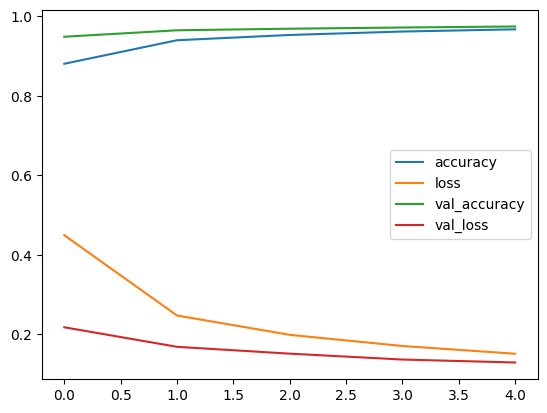

In [34]:
pd.DataFrame(history1.history).plot()

## Model2 to define an ANN

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, BatchNormalization, Dropout

In [15]:
model2 = Sequential()
model2.add(Flatten(input_shape = [28, 28], name = "inputlayer"))

model2.add(Dense(64, activation = "relu", name = "hiddenlayer1", kernel_regularizer= regularizers.L2(1e-4)))
model2.add(Dropout(0.2))    # Dropping 20% nodes for the above layer(HL1)

model2.add(Dense(32, activation = "relu", name = "hiddenlayer2", kernel_regularizer= regularizers.L1L2(l1 = 1e-4, l2 = 1e-5)))
model2.add(Dropout(0.1))     # Dropping 10% nodes for the above layer(HL2)

model2.add(Dense(16, activation = "relu", name = "hiddenlayer3", kernel_regularizer= regularizers.L1(1e-4)))
model2.add(Dropout(0.2))     # Dropping 20% nodes for the above layer(HL3)

model2.add(Dense(10, activation= "softmax", name = "outputlayer"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputlayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer1 (Dense)                 │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer2 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer3 (Dense)                 │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputlayer (Dense)                  │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
784 * 64 + 64

50240

In [19]:
64*32 + 32

2080

In [20]:
32*16 + 16

528

In [21]:
16 * 10 + 10

170

# Number of Parameters :-

I/P -> HL1 -> HL2 -> HL3 -> O/P

|-----------|-----------|-----------|------------|

50,240 +  2,080  +  528  +  170  = 53,018

In [22]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model2.compile(loss=LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = METRICS)


## Training of the model

In [29]:
EPOCHS = 5
VALIDATON_SET = (x_valid, y_valid)

history2 = model2.fit(x_train, y_train, epochs = EPOCHS, validation_data = VALIDATON_SET, batch_size= 32)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8867 - loss: 0.4407 - val_accuracy: 0.9512 - val_loss: 0.2393
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8996 - loss: 0.4042 - val_accuracy: 0.9522 - val_loss: 0.2290
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9057 - loss: 0.3829 - val_accuracy: 0.9548 - val_loss: 0.2195
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9140 - loss: 0.3612 - val_accuracy: 0.9566 - val_loss: 0.2128
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9165 - loss: 0.3503 - val_accuracy: 0.9610 - val_loss: 0.1993


In [31]:
pd.DataFrame(history2.history)

,accuracy,loss,val_accuracy,val_loss
0,0.890618,0.432398,0.9512,0.239256
1,0.898909,0.406357,0.9522,0.229022
2,0.905636,0.384122,0.9548,0.219545
3,0.914109,0.359054,0.9566,0.212828
4,0.918109,0.346375,0.9610,0.199299


<Axes: >

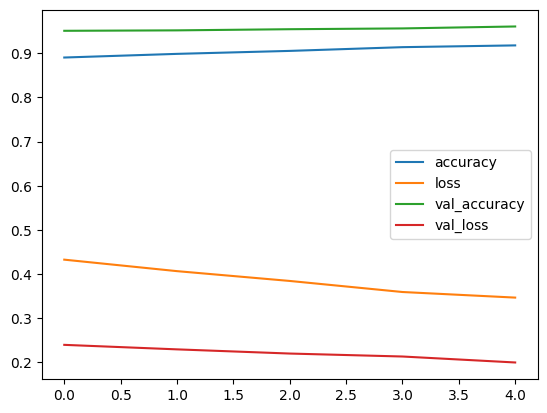

In [32]:
pd.DataFrame(history2.history).plot()

## **NOTE:** Accuracy is more in the first model, i.e. model1.

Both the models, i.e. **model1 and model2** are different methods to define a model but here I took different layers in them to check which ANN has better accuracy.